In [1]:
# Run this cell and select the kaggle.json file download from the kaggle account setting page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashishkumarmandal","key":"0df3c5e089c53dbd87eaaa6add6937ac"}'}

In [2]:
# Next, install the kaggle API Client
!pip install -q kaggle

In [3]:
# The Kaggle API Client excepts this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

# This permission change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
# Search for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          87741        991  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11506        256  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            404          9  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [6]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 99% 603M/612M [00:03<00:00, 188MB/s]
100% 612M/612M [00:03<00:00, 172MB/s]
/content


In [7]:
# Unzipping the download file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

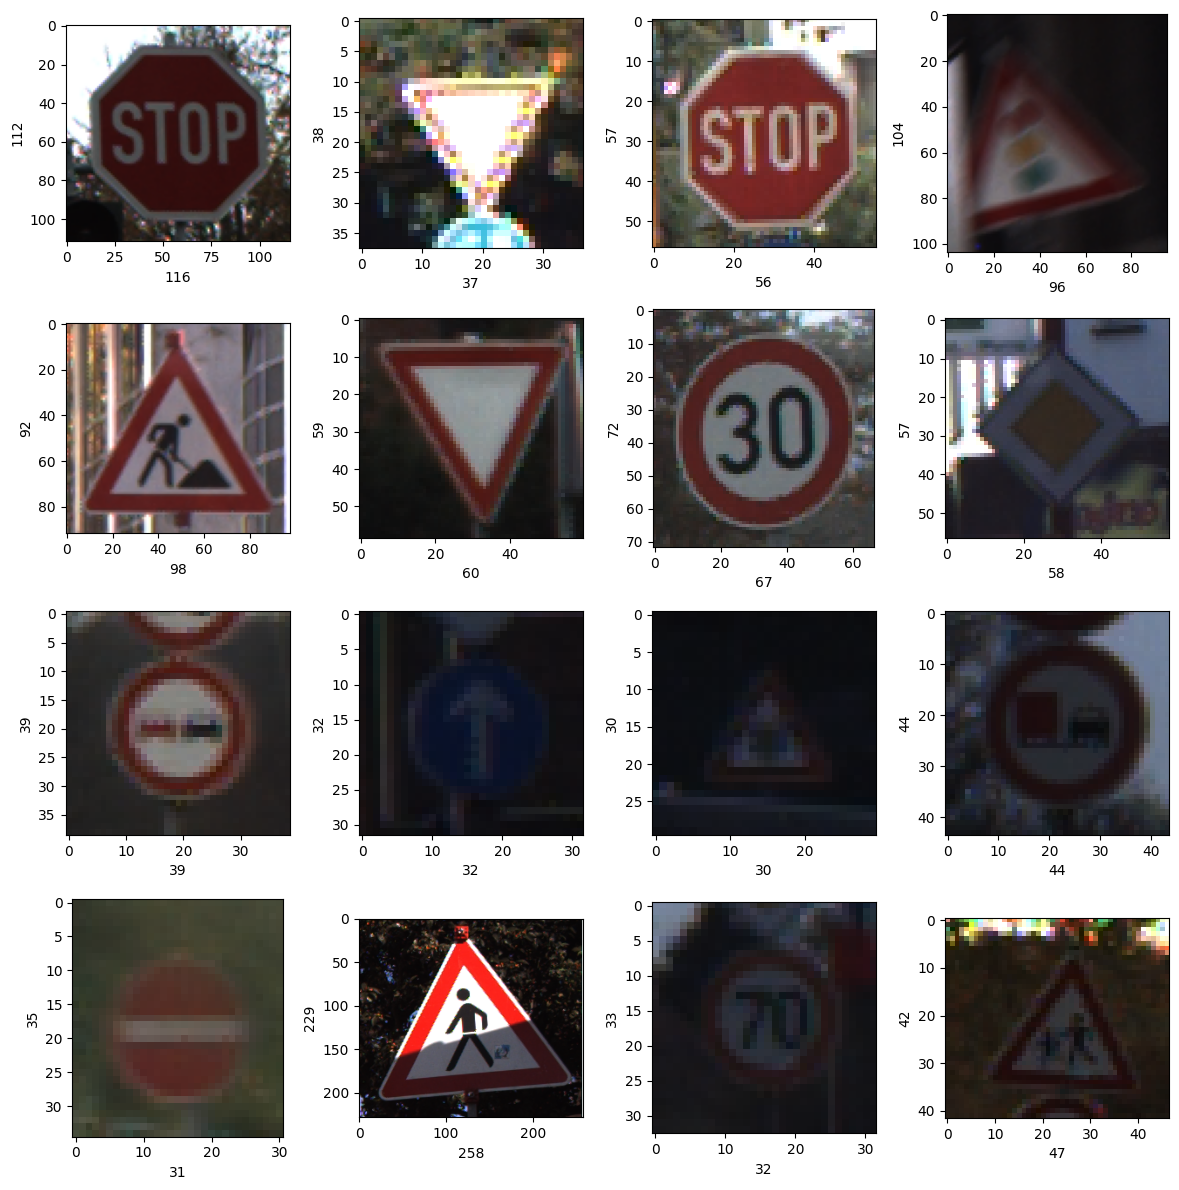

In [9]:
# Plotting 12 Image to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) # width of the image
  plt.ylabel(rand_img.shape[0], fontsize = 10) # height of the image

In [10]:
# As size of the image are different we have to make them equal so we will take mean of demensions
dim1 = []
dim2 = []

for i in range(0,43):
  labels = "traffic_sign_dataset/Train" + "/{0}".format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + "/" + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])



In [11]:
print("Dimension 1 Mean : ", np.mean(dim1), "Dimension 2 Mean : ", np.mean(dim2))

Dimension 1 Mean :  50.328929582493814 Dimension 2 Mean :  50.83587951745773


We can see that (50,50) is the average shape for all the image

In [12]:
# Now we will reshape the image to (50,50)
images = []
label_id = []

for i in range(43):
  labels = "traffic_sign_dataset/Train" + "/{0}".format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + "/" + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [13]:
# Converting images into numpy array
images = np.array(images)
#the pixel value of each image range between 0 to 255
# Dividing each image be 255 will scale the value between 0 to 1. This is also known as normalization.
images = images/255

In [14]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [15]:
images.shape

(39209, 50, 50, 3)

In [16]:
# Visualise the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [17]:
# Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.2, random_state = 42)

In [18]:
# keras has a built-in function for one_hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [19]:
# model the data
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(43, activation = "softmax"))

In [20]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [21]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 305s - loss: 2.5414 - accuracy: 0.3070 - val_loss: 1.3392 - val_accuracy: 0.6395 - 305s/epoch - 1s/step
Epoch 2/10
246/246 - 289s - loss: 1.2538 - accuracy: 0.6071 - val_loss: 0.5538 - val_accuracy: 0.8652 - 289s/epoch - 1s/step
Epoch 3/10
246/246 - 301s - loss: 0.8509 - accuracy: 0.7280 - val_loss: 0.3565 - val_accuracy: 0.9353 - 301s/epoch - 1s/step
Epoch 4/10
246/246 - 291s - loss: 0.6637 - accuracy: 0.7835 - val_loss: 0.2531 - val_accuracy: 0.9582 - 291s/epoch - 1s/step
Epoch 5/10
246/246 - 302s - loss: 0.5645 - accuracy: 0.8168 - val_loss: 0.1969 - val_accuracy: 0.9666 - 302s/epoch - 1s/step
Epoch 6/10
246/246 - 297s - loss: 0.4997 - accuracy: 0.8377 - val_loss: 0.1558 - val_accuracy: 0.9749 - 297s/epoch - 1s/step
Epoch 7/10
246/246 - 298s - loss: 0.4333 - accuracy: 0.8570 - val_loss: 0.1303 - val_accuracy: 0.9749 - 298s/epoch - 1s/step
Epoch 8/10
246/246 - 294s - loss: 0.3930 - accuracy: 0.8702 - val_loss: 0.1040 - val_accuracy: 0.9776 - 294s/epoch - 1s/step


<Axes: >

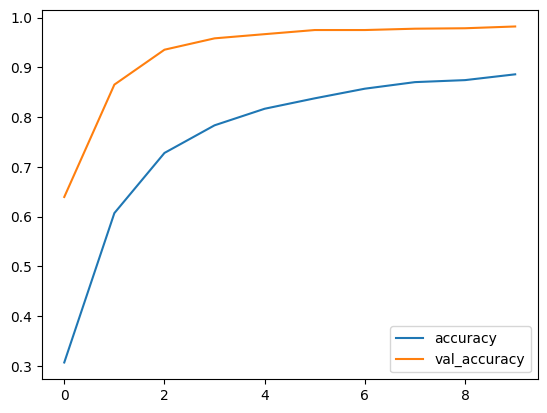

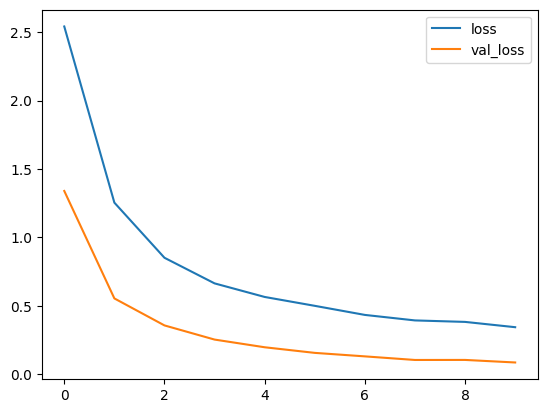

In [22]:
evaluation = pd.DataFrame(model.history.history)
evaluation[["accuracy", "val_accuracy"]].plot()
evaluation[["loss", "val_loss"]].plot()

In [23]:
test_path = "traffic_sign_dataset/Test"
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [24]:
from PIL import Image

def scaling(test_images, test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + "/" + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

    #converting images into numpy array
    images = np.array(images)
    images = images/255

    return images

In [25]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [26]:
test = pd.read_csv("traffic_sign_dataset/Test.csv")
y_test  = test["ClassId"].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [29]:
y_pred = (model.predict(test_images) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 346ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

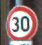

In [30]:
# Visualize test image
img = Image.open(test_path + "/00001.png")
img